In [1]:
import jax.numpy as jnp
from jax import random, jit, vmap, grad, jacfwd, jacrev, hessian, value_and_grad
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [35]:
# Simple 2D quadratic function
def f(theta_0, theta_1):
    return theta_0**2 + theta_1**2

In [222]:
# Plot surface and contour plots for f using jax.vmap
def create_plot(f):
    theta_0 = jnp.linspace(-2, 2, 100)
    theta_1 = jnp.linspace(-2, 2, 100)
    theta_0, theta_1 = jnp.meshgrid(theta_0, theta_1)
    f_vmap = jnp.vectorize(f, signature='(),()->()')
    f_vals = f_vmap(theta_0, theta_1)

    # Create a figure with 2 subplots (3d surface and 2d contour)
    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    # Plot surface and contour plots
    temp = ax1.plot_surface(theta_0, theta_1, f_vals, cmap='viridis')

    # Filled contour plot and marked level set values using clabel
    # Set 20 levels between min and max of f_vals
    levels = jnp.linspace(0.5, int(jnp.max(f_vals))+0.5, 11)

    contours = ax2.contour(theta_0, theta_1, f_vals, levels=levels, cmap='viridis')
    ax2.clabel(contours, inline=True, fontsize=8)

    # Fill using imshow
    ax2.imshow(f_vals, extent=[-2, 2, -2, 2], origin='lower', cmap='viridis', alpha=0.5)
  
    # Find the global minimum of f using jax.scipy.optimize.minimize
    from jax.scipy.optimize import minimize
    def f_min(theta):
        return f(theta[0], theta[1])
    res = minimize(f_min, jnp.array([0., 0.]), method='BFGS')
    theta_min = res.x
    f_min = res.fun
    print(f'Global minimum: {f_min} at {theta_min}')
    # Plot the global minimum
    ax2.scatter(theta_min[0], theta_min[1], marker='x', color='red', s=100)

    

    ax2.set_aspect('equal')

    # Add labels
    ax1.set_xlabel(r'$\theta_0$')
    ax1.set_ylabel(r'$\theta_1$')
    ax1.set_zlabel(r'$f(\theta_0, \theta_1)$')
    ax2.set_xlabel(r'$\theta_0$')
    ax2.set_ylabel(r'$\theta_1$')

    # Add colorbar
    fig.colorbar(temp, ax=ax1, shrink=0.5, aspect=5)

    # Tight layout
    plt.tight_layout()

Global minimum: 0.0 at [0. 0.]


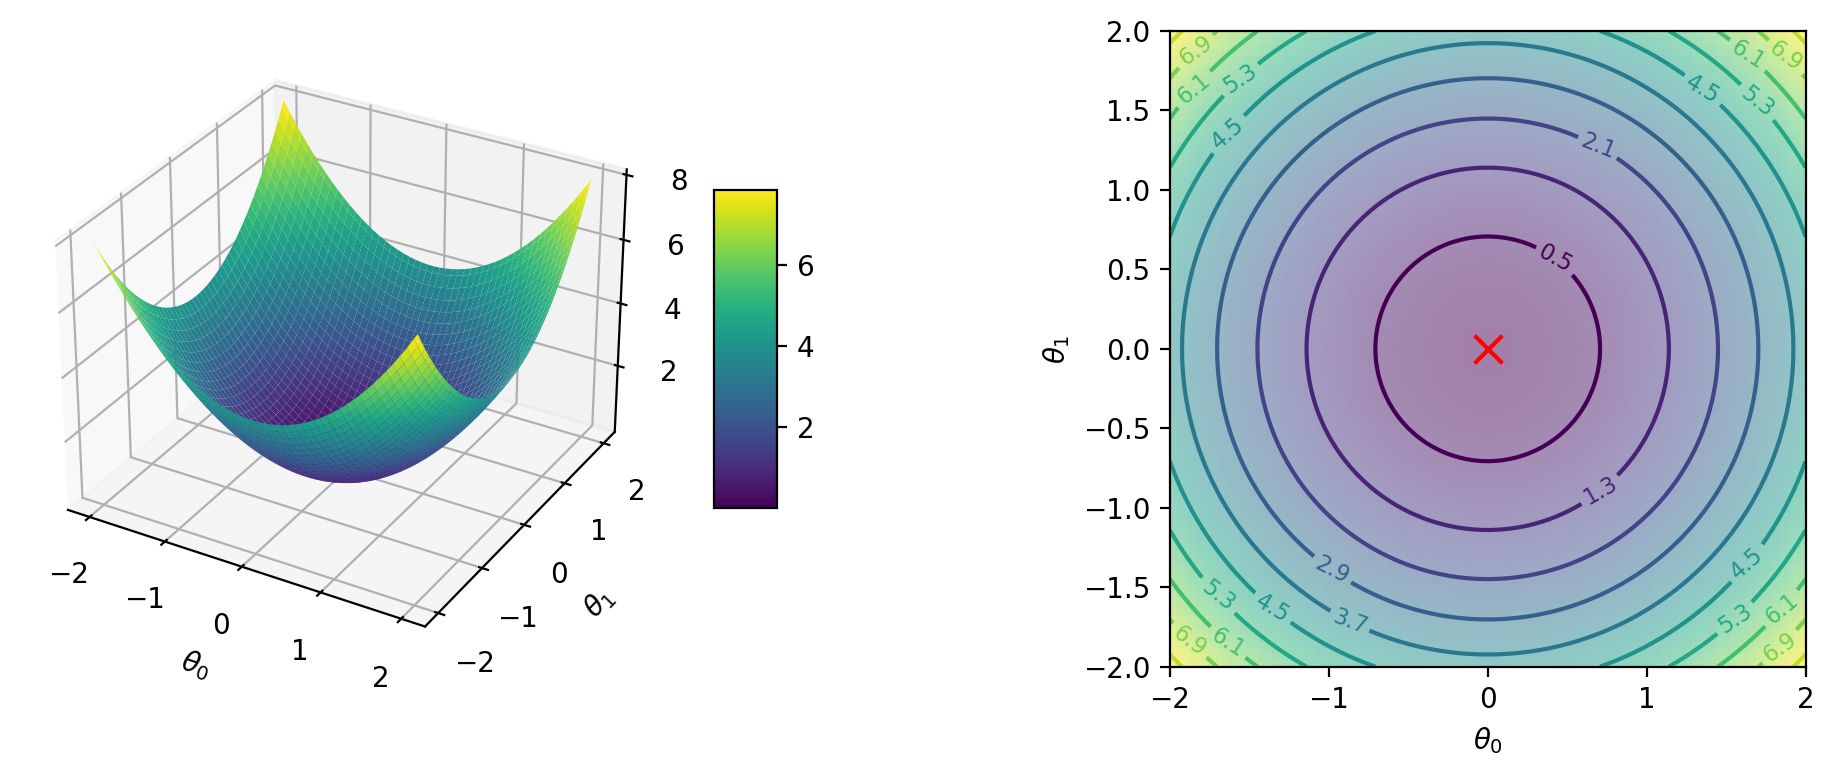

In [223]:
create_plot(f)

In [224]:
# Gradient of f at a given point
def grad_f(theta_0, theta_1):
    return grad(f, argnums=(0, 1))(theta_0, theta_1)

In [225]:
grad_f(2., 1.)

(Array(4., dtype=float32, weak_type=True),
 Array(2., dtype=float32, weak_type=True))

In [226]:
theta = jnp.array([2., 1.])
theta

Array([2., 1.], dtype=float32)

In [227]:
f(*theta)

Array(5., dtype=float32)

In [228]:
jnp.array(grad_f(*theta))

Array([4., 2.], dtype=float32)

In [229]:
lr = 0.1
theta = theta- lr * jnp.array(grad_f(*theta))
theta

Array([1.6, 0.8], dtype=float32)

In [230]:
f(*theta)

Array(3.2000003, dtype=float32)

In [231]:
# Gradient descent loop

# Initial parameters
theta = jnp.array([2., 1.])

# Store parameters and function values for plotting
theta_vals = [theta]
f_vals = [f(*theta)]

for i in range(10):
    theta = theta - lr * jnp.array(grad_f(*theta))
    theta_vals.append(theta)
    f_vals.append(f(*theta))
    print(f'Iteration {i}: theta = {theta}, f = {f(*theta)}')

theta_vals = jnp.array(theta_vals)
f_vals = jnp.array(f_vals)

Iteration 0: theta = [1.6 0.8], f = 3.200000286102295
Iteration 1: theta = [1.28 0.64], f = 2.047999858856201
Iteration 2: theta = [1.0239999  0.51199996], f = 1.3107198476791382
Iteration 3: theta = [0.8191999  0.40959996], f = 0.8388606309890747
Iteration 4: theta = [0.6553599  0.32767996], f = 0.5368707776069641
Iteration 5: theta = [0.52428794 0.26214397], f = 0.34359729290008545
Iteration 6: theta = [0.41943035 0.20971517], f = 0.21990226209163666
Iteration 7: theta = [0.3355443  0.16777214], f = 0.14073745906352997
Iteration 8: theta = [0.26843542 0.13421771], f = 0.09007196873426437
Iteration 9: theta = [0.21474834 0.10737417], f = 0.05764605849981308


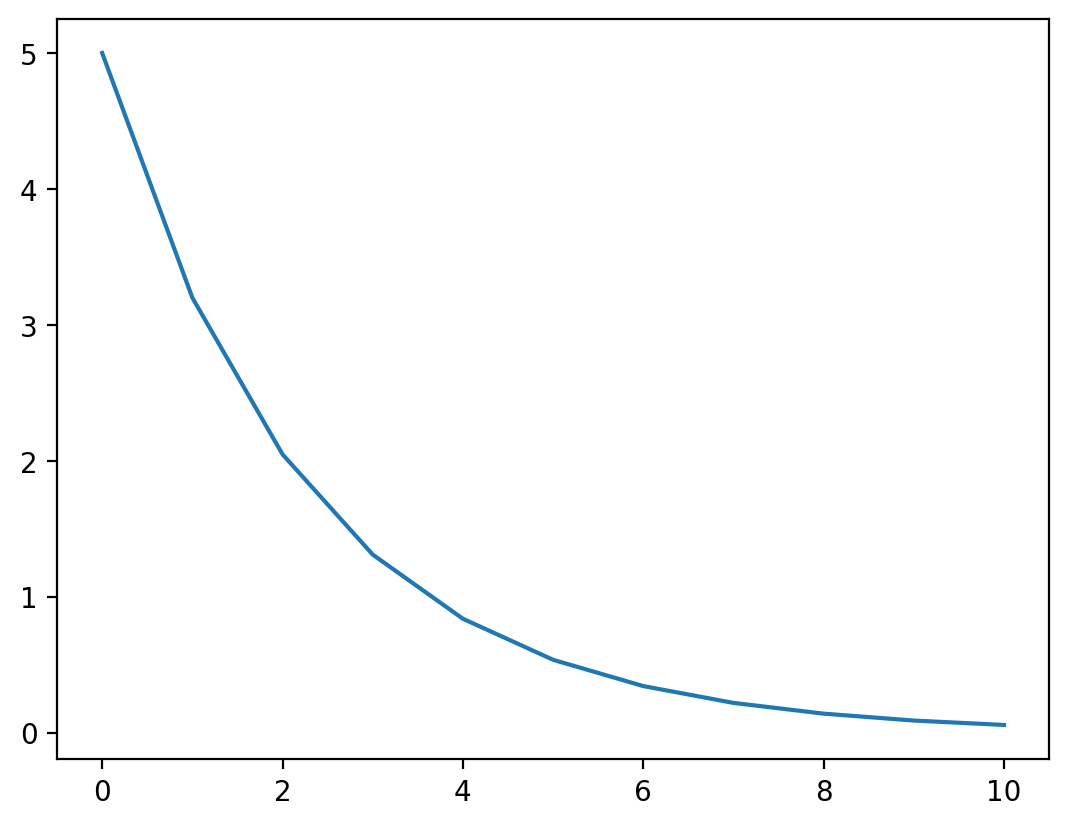

In [232]:
# Plot the cost vs iterations
plt.plot(f_vals)


In [233]:
# Simple dataset for linear regression

X = jnp.array([[1.], [2.], [3.]])
y = jnp.array([1., 2.2, 2.8])

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [234]:
lr.coef_, lr.intercept_

(array([0.9000001], dtype=float32), 0.19999981)

In [235]:
# Cost function for linear regression using jax.vmap
def cost(theta_0, theta_1):
    y_hat = (theta_0 + theta_1 * X).flatten()
    #print(y_hat, y, y-y_hat, (y-y_hat)**2)
    return jnp.mean((y_hat- y)**2)
    
# Plot surface and contour plots for cost function
#create_plot(cost)

In [236]:
cost(2.0, 2.0)

Array(16.826666, dtype=float32)

In [237]:
(3**2 + 3.8**2 + 5.2**2)/3.

16.826666666666668

In [238]:
# Gradient of cost function at a given point
def grad_cost(theta_0, theta_1):
    return jnp.array(grad(cost, argnums=(0, 1))(theta_0, theta_1))

grad_cost(2.0, 2.0)

Array([ 8.      , 17.466667], dtype=float32)

In [239]:
def grad_cost_manual(theta_0, theta_1):
    y_hat = (theta_0 + theta_1 * X).flatten()
    return jnp.array([2*jnp.mean(y_hat - y), 2*jnp.mean((y_hat - y) * X.flatten())])


In [240]:
grad_cost_manual(2.0, 2.0)

Array([ 8.      , 17.466667], dtype=float32)

In [241]:
# Plotting cost surface and contours for three points in X individually

def cost_i(theta_0, theta_1, i = 1):
    y_hat = theta_0 + theta_1 * X[i-1:i]
    return jnp.mean((y_hat- y[i-1:i])**2)


In [242]:
(cost_i(2.0, 2.0, 1) + cost_i(2.0, 2.0, 2) + cost_i(2.0, 2.0, 3))/3.0

Array(16.826666, dtype=float32)

In [243]:
from functools import partial

Global minimum: 0.0 at [0.5 0.5]
Global minimum: 0.0 at [0.44000003 0.88000005]
Global minimum: 0.0 at [0.28000003 0.84      ]


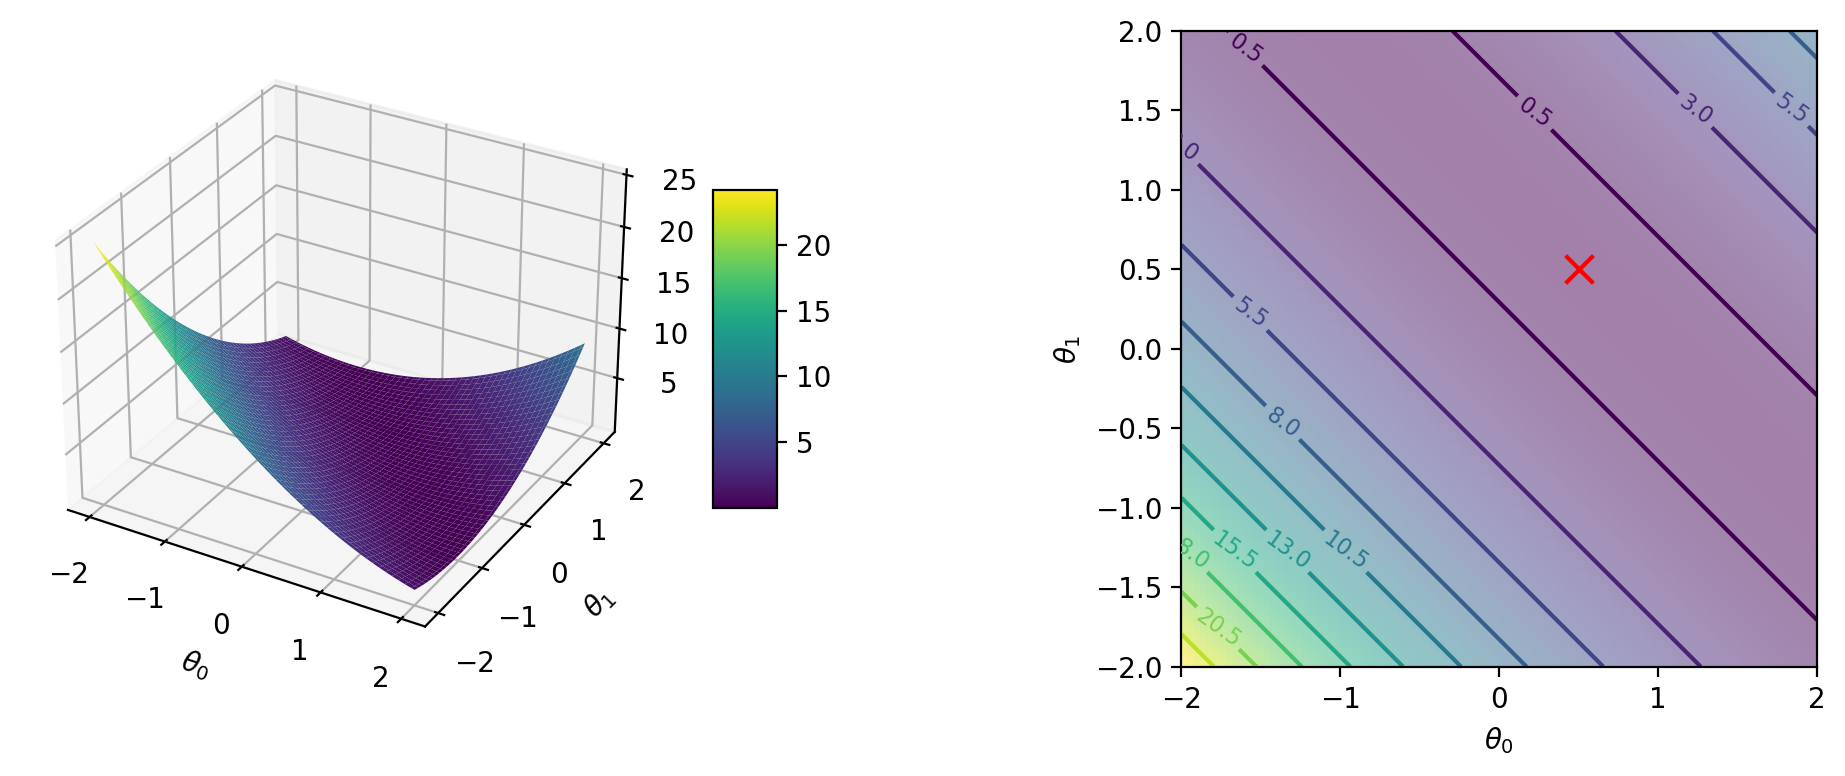

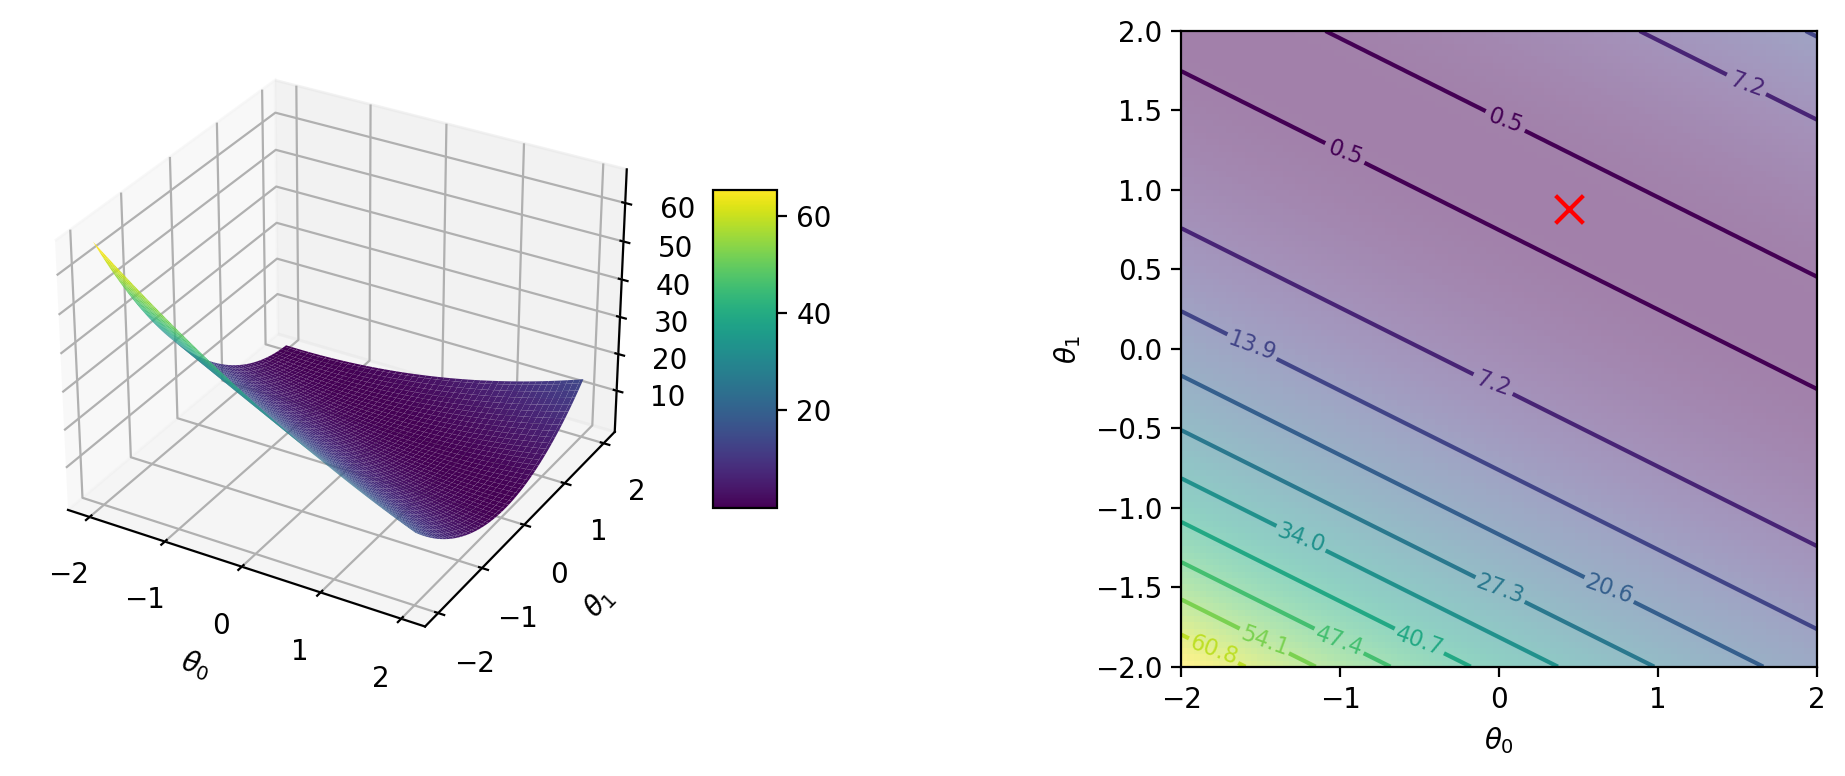

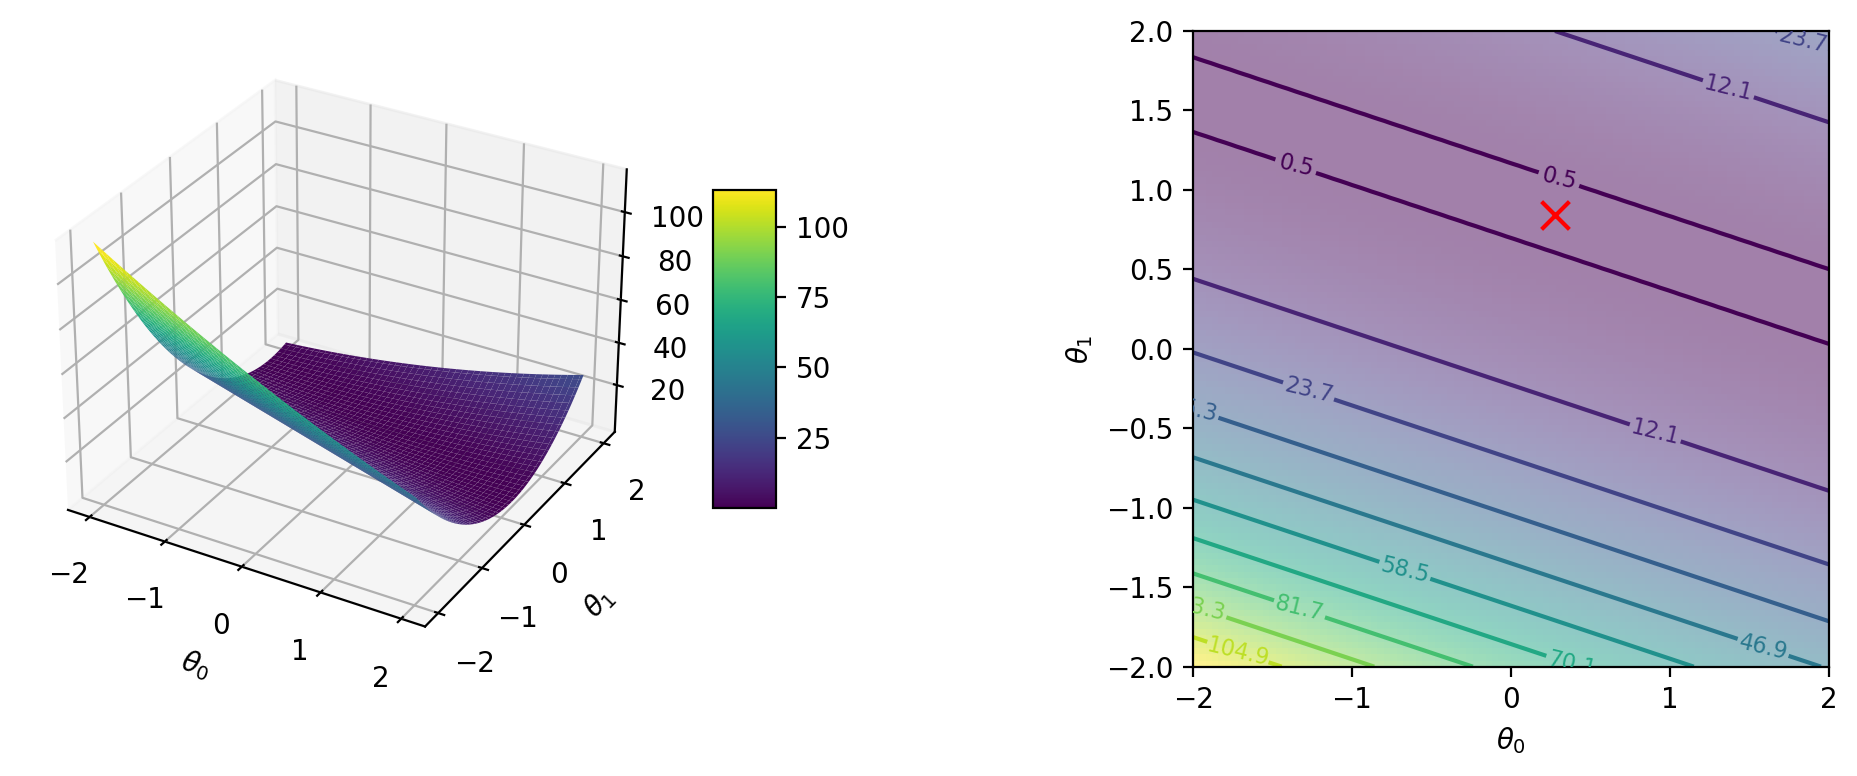

In [244]:
# Plot surface and contour plots for cost function
for i in range(1, 4):
    cost_i_p = partial(cost_i, i=i)
    create_plot(cost_i_p)

In [250]:
grad_cost_1 = grad(cost_i, argnums=(0, 1))
grad_cost_1(2.0, 2.0)

(Array(6., dtype=float32, weak_type=True),
 Array(6., dtype=float32, weak_type=True))

In [258]:
jnp.array(grad_cost_1(2.0, 2.0, 1)), jnp.array(grad_cost_1(2.0, 2.0, 2)), jnp.array(grad_cost_1(2.0, 2.0, 3))

(Array([6., 6.], dtype=float32),
 Array([ 7.6, 15.2], dtype=float32),
 Array([10.4     , 31.199999], dtype=float32))